In [28]:
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
dataset_path_train = '/content/drive/MyDrive/17Flowers/train'


idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    # data augmentation

    zoom_range=0.2,
    rotation_range=16,
    horizontal_flip=True

)

train_data = idg.flow_from_directory(
    dataset_path_train,
    shuffle=True,
    subset="training",
    target_size=(224,224),
    # save_to_dir="/content/drive/MyDrive/dataset/animal_test"
)

validation_data = idg.flow_from_directory(
    dataset_path_train,
    subset="validation",
    target_size=(224,224)
)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [30]:
width = height = 224

model = tf.keras.applications.InceptionV3(include_top=False,
                                                input_shape=(width,height,3),
                                                weights="imagenet")


In [31]:
my_model = models.Sequential([
    model,
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation="tanh"),
    layers.Dense(17, activation="softmax"),
])




In [32]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalizati

In [33]:
my_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )


history = my_model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20)


Epoch 1/20
26/26 [==============================] - 620s 23s/step - loss: 2.2124 - accuracy: 0.3815 - val_loss: 1.6319 - val_accuracy: 0.5025
Epoch 2/20
26/26 [==============================] - 19s 744ms/step - loss: 0.6379 - accuracy: 0.8214 - val_loss: 1.0170 - val_accuracy: 0.6954
Epoch 3/20
26/26 [==============================] - 21s 814ms/step - loss: 0.2468 - accuracy: 0.9405 - val_loss: 0.6992 - val_accuracy: 0.7817
Epoch 4/20
26/26 [==============================] - 19s 740ms/step - loss: 0.1339 - accuracy: 0.9708 - val_loss: 0.6223 - val_accuracy: 0.7970
Epoch 5/20
26/26 [==============================] - 22s 828ms/step - loss: 0.0681 - accuracy: 0.9915 - val_loss: 0.4035 - val_accuracy: 0.8782
Epoch 6/20
26/26 [==============================] - 19s 737ms/step - loss: 0.0617 - accuracy: 0.9903 - val_loss: 0.3192 - val_accuracy: 0.9086
Epoch 7/20
26/26 [==============================] - 20s 762ms/step - loss: 0.0501 - accuracy: 0.9891 - val_loss: 0.3103 - val_accuracy: 0.8934


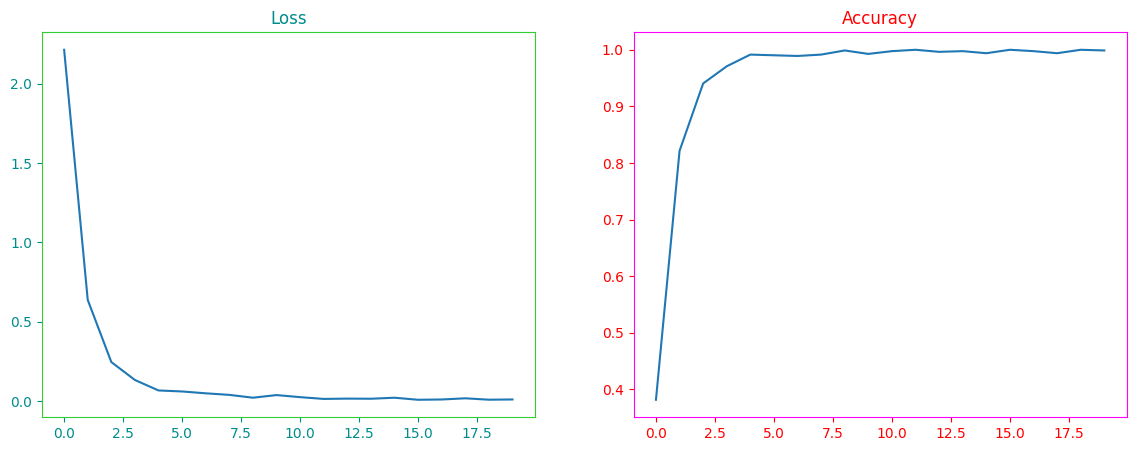

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax1.title.set_color('darkcyan')
ax1.tick_params(axis='x' , colors='darkcyan')
ax1.tick_params(axis='y' , colors='darkcyan')
ax1.spines['bottom'].set_color('limegreen')
ax1.spines['right'].set_color('limegreen')
ax1.spines['left'].set_color('limegreen')
ax1.spines['top'].set_color('limegreen')
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
ax2.title.set_color('red')
ax2.tick_params(axis='x' , colors='red')
ax2.tick_params(axis='y' , colors='red')
ax2.spines['bottom'].set_color('magenta')
ax2.spines['right'].set_color('magenta')
ax2.spines['left'].set_color('magenta')
ax2.spines['top'].set_color('magenta')
plt.show()

In [35]:
dataset_path_test = '/content/drive/MyDrive/17Flowers/test'

idg = ImageDataGenerator(rescale=1./255)

test_data = idg.flow_from_directory(
    dataset_path_test,
    shuffle=False,
    target_size=(width,height)
)

Found 340 images belonging to 17 classes.


In [36]:
my_model.evaluate(test_data)

11/11 [==============================] - 230s 23s/step - loss: 0.2758 - accuracy: 0.9265


[0.27578794956207275, 0.9264705777168274]

In [41]:
my_model.save('/content/drive/MyDrive/weights/flowerـrecognition_transfer_learning_model.h5')

Y_pred = my_model.predict(validation_data)
y_predict = np.argmax(Y_pred , axis=1)



7/7 [==============================] - 4s 521ms/step


In [42]:
print(test_data.classes)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16

In [44]:
Y_pred = model.predict(test_data)
y_predict = np.argmax(Y_pred , axis=1)

11/11 [==============================] - 3s 136ms/step
